Imports

In [615]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import ToktokTokenizer
from nltk.stem import PorterStemmer
import unicodedata
import nltk
import spacy
from preprocessing import NLPPipe
from sklearn.decomposition import NMF

In [616]:
topic_df = pickle.load(open("topic_df", "rb"))

### Disease subtopics

In [617]:
current_topic = 'Diseases/ Epidemics/ Viruses'
virus_df = topic_df[topic_df.closest_topic == 'Diseases/ Epidemics/ Viruses']

In [618]:
vectorizer = TfidfVectorizer(
                sublinear_tf=True,
                analyzer='word',
                token_pattern=r'\w{1,}',
                max_df = .5,
                min_df = 0.0001,
                ngram_range=(1, 1),
                max_features=50000)

In [619]:
nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

In [745]:
nlp.fit(virus_df, cleaned = False)

In [621]:
dtm = nlp.transform(virus_df, cleaned = True)

In [622]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [623]:
nmf_model = NMF(15, random_state=2)

In [624]:
doc_topic = nmf_model.fit_transform(dtm)

In [625]:
topic_names = [ 'COVID-19', 'Bird Flu/Swine Flu', 'Immunology/Vaccine Trials', '?' , 
              'Neurodegenerative Diseases, Animal/Meat-borne', 'Ebola', 'Biosecurity', 'HIV', 'Polio', '??', 'Malaria', 
              'Bacterial Infections', 'Epidemiology', '???', 'Mosquito-Borne (Dengue, Zika, Yellow Fever, etc)']

In [366]:
display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)


Topic  0
covid, coronavirus, sarscov, testing, lockdown, china, wuhan, test, dont, city, state, home, pandemic, scientist, travel, day, positive, measure, hospital, mask, person, need, united, keep, outbreak, lab, tested, preprint, community, data

Topic  1
flu, bird, hn, avian, poultry, influenza, human, pandemic, strain, chicken, asia, vietnam, pig, fao, outbreak, china, spread, surveillance, agriculture, organization, hong, humantohuman, kong, indonesia, duck, thailand, farm, gene, official, sample

Topic  2
vaccine, trial, immune, antibody, company, response, protein, clinical, cell, dos, produce, vaccination, effective, production, jab, protection, protect, u, strain, maryland, developed, shot, make, made, dose, flu, used, institute, use, called

Topic  3
human, animal, team, monkey, siv, primate, strain, sequence, found, specie, bat, chimpanzee, genetic, host, cell, genome, finding, different, chimp, gene, hiv, infect, wild, viral, reservoir, sample, mutation, protein, colleague

In [626]:
H = pd.DataFrame(doc_topic.round(5),
             index = virus_df.title.values,
             columns = topic_names)
H.drop(columns=['?', '??', '???'], inplace=True)

In [627]:
maxes = H.max(axis=1).values

In [628]:
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

In [629]:
subtopics = []
for i in range(len(topic_df)):
    subtopics.append('')
topic_df['subtopic'] = subtopics

In [630]:
for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic==current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 12]

### Climate Science subtopics

In [636]:
current_topic = 'Climate Science'
climate_df = topic_df[topic_df.closest_topic == 'Climate Science']

In [637]:
nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

In [746]:
nlp.fit(climate_df, cleaned = False)

In [639]:
dtm = nlp.transform(climate_df, cleaned = True)

In [640]:
nmf_model = NMF(12, random_state=2)

In [747]:
doc_topic = nmf_model.fit_transform(dtm)

In [642]:
topic_names = ['Extreme Weather Events', 'International Cooperation', 'Greenhouse Gases, Permafrost', 'Ozone Depletion/Atmosphere', 'IPCC', '??', 
               'Deforestation, Rainforests', 'Phytoplankton', 'Hurricanes, Tropical Cyclones', 'Pollution, Air Quality, Emissions', 
               'Aerosols', 'Renewable Energy']

In [380]:
display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 20)


Topic  0
temperature, weather, event, extreme, model, rainfall, region, drought, record, summer, century, average, europe, heat, flood, pattern, human, increase, trend, condition

Topic  1
country, target, nation, kyoto, agreement, united, greenhousegas, protocol, developing, reduction, cut, paris, commitment, international, reduce, talk, said, level, treaty, action

Topic  2
methane, gas, soil, greenhouse, ice, permafrost, release, plant, dioxide, team, atmosphere, tonne, estimate, wetland, amount, co, atmospheric, source, microbe, finding

Topic  3
ozone, cfc, stratosphere, layer, montreal, hole, chemical, depletion, arctic, stratospheric, antarctic, chlorine, protocol, chlorofluorocarbon, polar, atmosphere, ultraviolet, ozonedepleting, atmospheric, reaction

Topic  4
ipcc, panel, assessment, intergovernmental, ipccs, working, author, group, rise, pachauri, summary, scenario, policymakers, sealevel, glacier, review, impact, scientific, science, ice

Topic  5
science, scientific, u, 

In [643]:
H = pd.DataFrame(doc_topic.round(5),
             index = climate_df.title.values,
             columns = topic_names)
H.drop(columns=['??'], inplace=True)

In [644]:
maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

In [647]:
current_topic = 'Climate Science'

In [648]:
for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 11]

In [580]:
import matplotlib.pyplot as plt
def plot_topic_timeline(topic, subtopic=None, subtopic_only=False):
    if subtopic == None and subtopic_only == True:
        raise NameError('Need to plot either a topic or subtopic\nEither set the subtopic argument, or set subtopic_only = False')
    
    fig, ax = plt.subplots(figsize=(12,8))
    year_list = []
    article_list = []
    subtopic_list = []
    for i in range(1998, 2021):
        for j in range(1, 13):
            df_date = topic_df[(topic_df['year'] == i)]
            
            year_list.append(i)
            if len(df_date) < 10:
                article_list.append(0)
            else:
                mask = df_date.all_topics.apply(lambda x: any(item for item in [topic] if item in x))
                df_subset = df_date[mask]
                df_subtopic = df_subset[df_subset.subtopic == subtopic]
                article_list.append(len(df_subset)/len(df_date))
                subtopic_list.append(len(df_subtopic)/len(df_date))
                
    if not subtopic_only:
        ax.plot(year_list, article_list)
        ax.set_title(f"Topic: {topic}", fontsize=15)
    else:
        ax.set_title(f"Topic: {subtopic}", fontsize=15)
    if subtopic:
        ax.plot(year_list, subtopic_list)
        

        

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Topic Frequency (Fraction of Total)', fontsize=14)
    
    
    


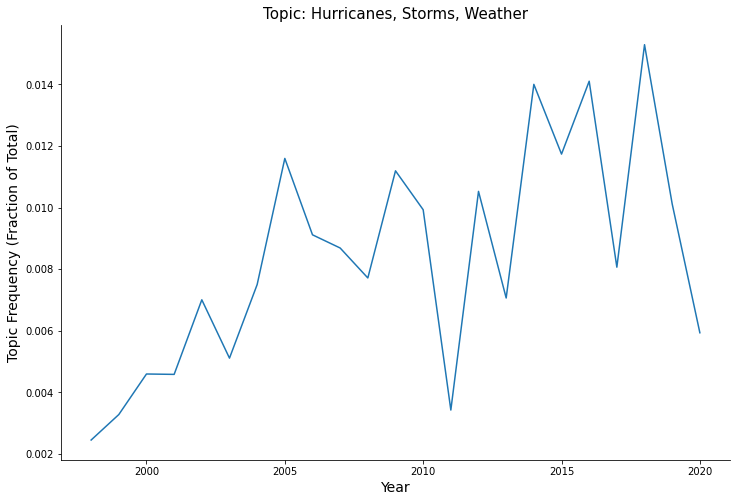

In [581]:
plot_topic_timeline('Ocean Sciences/ Geology', subtopic = 'Hurricanes, Storms, Weather', subtopic_only = True)

### Physics subtopics

In [748]:
physics_df = topic_df[topic_df.closest_topic == 'Phyics/ Particle Physics/ Quantum Physics']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(physics_df, cleaned = False)

dtm = nlp.transform(physics_df, cleaned = True)

nmf_model = NMF(14, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 20)

In [652]:
topic_names = ['Black Holes, Gravity, General Relativity', '?', '??', 'Particle Physics', 
               'Dark Matter', 'Atomic Physics', '???', '????', 'Nobel Prize', 'Neutrinos', 'Space Physics, Cosmic Rays', 
               'Nuclear Physics', '?????', 'Quantum Physics'] 

H = pd.DataFrame(doc_topic.round(5),
             index = physics_df.title.values,
             columns = topic_names)
H.drop(columns=['?', '??', '???', '????', '?????'], inplace=True)

In [653]:
current_topic = 'Phyics/ Particle Physics/ Quantum Physics'

In [654]:
maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 9]

### Neuro subtopics

In [749]:
current_topic = 'Neuroscience/ Behavioral Sci.'

neuro_df = topic_df[topic_df.closest_topic == 'Neuroscience/ Behavioral Sci.']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(neuro_df, cleaned = False)

dtm = nlp.transform(neuro_df, cleaned = True)

nmf_model = NMF(15, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 40)

In [656]:
topic_names = ['?', '??', 'Alcoholism, Obesity, Cancer, Pregnancy/Childbirth, Risk Factors', 'Academia', 'Linguistics, Speech Pathology',
               'Reproduction, Sexual Behavior', 'Drugs, Hormones, Depression, Anxiety, PTSD', 
               'Motor Control, Neural Circuits, Sensory Processing', 'Consciousness, Brain Activity, Comas', 
               'Auditory System', 'Emotion, Emotional Disorders, Autism', 'Visual System', 'Sleep, Memory', '???', 'Olfactory System'] 
H = pd.DataFrame(doc_topic.round(5),
             index = neuro_df.title.values,
             columns = topic_names)
H.drop(columns=['?', '??', 'Academia', '???'], inplace=True)

In [657]:
maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 11]

### Astronomy subtopics

In [750]:
current_topic = 'Astronomy'
astronomy_df = topic_df[topic_df.closest_topic == 'Astronomy']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(astronomy_df, cleaned = False)

dtm = nlp.transform(astronomy_df, cleaned = True)

nmf_model = NMF(10, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

In [659]:
topic_names = ['Supernovas, Cosmic Rays', '?', 'Exoplanets, Distant Planets', '??', 'Dark Matter, Cosmology', 'LIGO, Gravitational Waves', 
               'Solar System', 'Black Holes', 'Atmosphere', 'TMT Protests']

H = pd.DataFrame(doc_topic.round(5),
             index = astronomy_df.title.values,
             columns = topic_names)
H.drop(columns=['?', '??'], inplace=True)

In [660]:
maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 8]

### Chem/Computing/Mathematics subtopics

In [751]:
current_topic = 'Optics/ Electronics/ Photonics/ Device Physics'

device_df = topic_df[topic_df.closest_topic == 'Optics/ Electronics/ Photonics/ Device Physics']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(device_df, cleaned = False)

dtm = nlp.transform(device_df, cleaned = True)

nmf_model = NMF(10, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 35)

In [662]:
topic_names = ['Chemistry', '?', 'Tech, Computing, Software', 'Quantum Computing', 'Semiconductors, Electronics', 'Light, Optics, Lasers', 
               'Superconductors, Magnetism', 'Energy, Fuel', 'Aerodynamics, Fluid Dynamics', '??']

H = pd.DataFrame(doc_topic.round(5),
             index = device_df.title.values,
             columns = topic_names)
H.drop(columns=['?', '??'], inplace=True)

In [663]:
maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 8]

### Drug discovery subtopics

In [752]:
current_topic = 'Drug Discovery/ Pharmaceuticals'
pharma_df = topic_df[topic_df.closest_topic == 'Drug Discovery/ Pharmaceuticals']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(pharma_df, cleaned = False)

dtm = nlp.transform(pharma_df, cleaned = True)

nmf_model = NMF(10, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

In [665]:
topic_names = ['Cancer, Alzheimers', '?', '??', 'Infectious Diseases', 'Pharmaceutical Industry', 
              'Immunodeficiencies, Gene Therapy', 'Heart Disease, Cholesterol, Strokes, Diabetes', 
              'Mental Health, Depression, Suicide', '???', 'COVID Vaccinations/Regulations']


H = pd.DataFrame(doc_topic.round(5),
             index = pharma_df.title.values,
             columns = topic_names)
H.drop(columns=['?', '??', '???'], inplace=True)

maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 7]

### Research/Funding subtopics

In [753]:
current_topic = 'Research/ Funding/ Grants'
research_df = topic_df[topic_df.closest_topic == 'Research/ Funding/ Grants']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(research_df, cleaned = False)

dtm = nlp.transform(research_df, cleaned = True)

nmf_model = NMF(5, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

Did not get good subtopics: Articles with this as their topic won't be broken up further

In [667]:
topic_names = ['None', 'None', 'None', 'None', 'None']


H = pd.DataFrame(doc_topic.round(5),
             index = research_df.title.values,
             columns = topic_names)
# H.drop(columns=['?', '??', '???'], inplace=True)

maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 5]

### Genetics subtopics

In [754]:
current_topic = 'Genetics/Genomics'
gene_df = topic_df[topic_df.closest_topic == 'Genetics/Genomics']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(gene_df, cleaned = False)

dtm = nlp.transform(gene_df, cleaned = True)

nmf_model = NMF(10, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

In [669]:
topic_names = ['?', 'Genomics, Human Genome Project', 'Cancer Genetics', 'Gene Editing, CRISPR-Cas Systems', 
               '??', 'Sequencing', 'Evolutionary Biology', 'Population Genetics', 'Microbial Genetics', 
               '???']


H = pd.DataFrame(doc_topic.round(5),
             index = gene_df.title.values,
             columns = topic_names)
H.drop(columns=['?', '??', '???'], inplace=True)

maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 7]

### Ocean Science subtopics

In [755]:
current_topic = 'Ocean Sciences/ Geology'
ocean_df = topic_df[topic_df.closest_topic == 'Ocean Sciences/ Geology']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(ocean_df, cleaned = False)

dtm = nlp.transform(ocean_df, cleaned = True)

nmf_model = NMF(10, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

In [671]:
topic_names = ['?', 'Seismology, Tectonics', 'Glaciology, Antarctica, Global Warming', 
              'Marine Biology, Marine Chemistry', '??', 'Pollution, Oil Spills, Environmental Impact', 
              'Hurricanes, Storms, Weather', 'Volcanology', '???', 'Tsunamis']


H = pd.DataFrame(doc_topic.round(5),
             index = ocean_df.title.values,
             columns = topic_names)
H.drop(columns=['?', '??', '???'], inplace=True)

maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 7]

### Govt/Policy subtopics

Did not get good subtopics.  Articles with this topic won't be broken up further

In [756]:
current_topic = 'Government/ Policy'
policy_df = topic_df[topic_df.closest_topic == 'Government/ Policy']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(policy_df, cleaned = False)

dtm = nlp.transform(policy_df, cleaned = True)

nmf_model = NMF(5, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

In [673]:
topic_names = ['None', 'None', 'None', 'None', 'None']


H = pd.DataFrame(doc_topic.round(5),
             index = policy_df.title.values,
             columns = topic_names)
# H.drop(columns=['?', '??', '???'], inplace=True)

maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 5]

### Stem Cell subtopics

In [757]:
current_topic = 'Stem Cells/ Cloning'
stem_df = topic_df[topic_df.closest_topic == 'Stem Cells/ Cloning']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(stem_df, cleaned = False)

dtm = nlp.transform(stem_df, cleaned = True)

nmf_model = NMF(10, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

# display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

In [675]:
topic_names = ['Bone Marrow Transplant, Heart/Neural Stem Cells', '?', 'IVF, Embryonic Stem Cells', 
               'Stem Cell Controversies', '??',
               'Gene Editing, CRISPR-Cas Systems', 'Stem Cell Controversies', 'Cloning', 
               'Pluripotent Stem Cells', '???']


H = pd.DataFrame(doc_topic.round(5),
             index = stem_df.title.values,
             columns = topic_names)
H.drop(columns=['?', '??', '???'], inplace=True)

maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 7]

### Agriculture/Plant Science subtopics

In [758]:
current_topic = 'Agriculture/ Plant Sciences'
plant_df = topic_df[topic_df.closest_topic == 'Agriculture/ Plant Sciences']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(plant_df, cleaned = False)

dtm = nlp.transform(plant_df, cleaned = True)

nmf_model = NMF(10, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

In [677]:
topic_names = ['Plant Genetics, Plant Breeding', '?', '??', 'GMOs, Plant Biotechnology', 
               'Pests, Toxins, Bacteria', '???', 'Food and Drug Administration', 
               'Chemicals, Pollution, Environmental Impact', '????', '?????']


H = pd.DataFrame(doc_topic.round(5),
             index = plant_df.title.values,
             columns = topic_names)
H.drop(columns=['?', '??', '???', '????', '?????'], inplace=True)

maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 5]

### Cellular Bio subtopics

In [759]:
current_topic = 'Cellular Bio./ Molecular Bio.'
cell_df = topic_df[topic_df.closest_topic == 'Cellular Bio./ Molecular Bio.']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(cell_df, cleaned = False)

dtm = nlp.transform(cell_df, cleaned = True)

nmf_model = NMF(12, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

# display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

In [679]:
topic_names = ['?', 'Genetics, DNA/RNA', '??', 'Bacteria', 
              'Neurodegenerative Diseases', '???', 'Cellular Neuroscience', 'Cancer', 'Viruses', 
              'Transferrin, Iron overload, Hereditary Diseases', 'Obesity, Diabetes, Blood Disorders',
              'Alzheimers Disease, Dementia, Parkinsons Disease']


H = pd.DataFrame(doc_topic.round(5),
             index = cell_df.title.values,
             columns = topic_names)
H.drop(columns=['?', '??', '???'], inplace=True)

maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 9]

### Evolution subtopics

In [760]:
current_topic = 'Evolution/ Archaeology'
evolution_df = topic_df[topic_df.closest_topic == 'Evolution/ Archaeology']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(evolution_df, cleaned = False)

dtm = nlp.transform(evolution_df, cleaned = True)

nmf_model = NMF(8, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

# display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

In [681]:
topic_names = ['Animal Evolution', '?', 'Evolutionary Genetics', 'Geology', 
              '??', 'Homo Sapiens, Anthropology', 'Paleontology', 
              'Archaeology']

H = pd.DataFrame(doc_topic.round(5),
             index = evolution_df.title.values,
             columns = topic_names)
H.drop(columns=['?', '??'], inplace=True)

maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 6]

### Space travel subtopics

In [761]:
current_topic = 'Space Travel/ Exploration'
space_df = topic_df[topic_df.closest_topic == 'Space Travel/ Exploration']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(space_df, cleaned = False)

dtm = nlp.transform(space_df, cleaned = True)

nmf_model = NMF(10, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

# display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

In [683]:
topic_names = ['Atmospheric Dynamics, Satellites', '?', 'Mars', 'Spaceflight Disasters', 
              'European Space Agency', 'Asteroids, Comets, Outer Planets', 'Moon, Rockets, Space Expeditions',
              'Giant Planets', '??', '???']

In [684]:
H = pd.DataFrame(doc_topic.round(5),
             index = space_df.title.values,
             columns = topic_names)
H.drop(columns=['?', '??', '???'], inplace=True)

maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 7]

### Wildlife/Biodiversity Subtopics

In [762]:
current_topic = 'Wildlife/ Conservation/ Biodiversity'
wildlife_df = topic_df[topic_df.closest_topic == 'Wildlife/ Conservation/ Biodiversity']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(wildlife_df, cleaned = False)

dtm = nlp.transform(wildlife_df, cleaned = True)

nmf_model = NMF(12, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

# display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

In [689]:
topic_names = ['Biodiversity', 'Sexual Selection, Reproduction', 'Marine Conservation', 
              'Endangered Species', '?', 'Birds, Bats, Predators, Instincts', 
              'Ecological Genetics', 'Pollution, Disease, Frog Extinction', 
              'Arctic Conservation, Warming, Seal Hunting', 'Hunting, Elephant Poaching',
              'Darwin, Galapagos Islands, Galapagos Tortoises', 'Grasslands, Savannah']

In [690]:
H = pd.DataFrame(doc_topic.round(5),
             index = wildlife_df.title.values,
             columns = topic_names)
H.drop(columns=['?'], inplace=True)

maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 11]

### Planetary Science subtopics

In [763]:
current_topic = 'Planetary Science/ Solar System'
planet_df = topic_df[topic_df.closest_topic == 'Planetary Science/ Solar System']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(planet_df, cleaned = False)

dtm = nlp.transform(planet_df, cleaned = True)

nmf_model = NMF(7, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

# display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

In [692]:
topic_names = ['Planets, Constellations', 'None', 'None', 'None', 'None', 'The Sun', 'None']

In [693]:
H = pd.DataFrame(doc_topic.round(5),
             index = planet_df.title.values,
             columns = topic_names)
# H.drop(columns=['?'], inplace=True)

maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 7]

In [ ]:
current_topic = 'Conferences/ Symposiums'
conference_df = topic_df[topic_df.closest_topic == 'Conferences/ Symposiums']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(conference_df, cleaned = False)

dtm = nlp.transform(conference_df, cleaned = True)

nmf_model = NMF(2, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

# display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

In [696]:
topic_names = ['None', 'None']

In [697]:
H = pd.DataFrame(doc_topic.round(5),
             index = conference_df.title.values,
             columns = topic_names)
# H.drop(columns=['?'], inplace=True)

maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 2]

In [764]:
current_topic = 'International Affairs'
int_df = topic_df[topic_df.closest_topic == 'International Affairs']

nlp = NLPPipe(vectorizer=vectorizer, 
              tokenizer=ToktokTokenizer(),
              cleaning_function=None, 
              stemmer=None,
              model = None,
              sw_list = None)

nlp.fit(int_df, cleaned = False)

dtm = nlp.transform(int_df, cleaned = True)

nmf_model = NMF(10, random_state=2)

doc_topic = nmf_model.fit_transform(dtm)

# display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 30)

In [699]:
topic_names = ['?', '??', 'Climate Change', '???', 'Nuclear Proliferation', 'European Union', 
              '????', 'Human/Animal Rights', '?????', 'Developing World, Public Health']

In [700]:
H = pd.DataFrame(doc_topic.round(5),
             index = int_df.title.values,
             columns = topic_names)
H.drop(columns=['?', '??', '???', '????', '?????'], inplace=True)

maxes = H.max(axis=1).values
article_topics = []
for i, row in enumerate(H.index):
    top_topics = []
    if maxes[i] == 0:
        article_topics.append('None')
    else:
        for j, column in enumerate(H.columns):
            if H.iloc[i, j] == maxes[i] and maxes[i] > 0:
                top_topics.append(column)
        article_topics.append(top_topics[0])
    
    
H['closest_topic'] = article_topics

for i, title in enumerate(H.index):
    ind = topic_df[(topic_df.title == title) & (topic_df.closest_topic == current_topic)].index.values[0]
    topic_df.loc[ind, 'subtopic'] = H.iloc[i, 5]

In [703]:
topic_df.subtopic.replace(to_replace='', value='None', inplace=True)

In [705]:
pickle.dump(topic_df, open('subtopic_df', 'wb'))